# Gregors

## Context
Gregors is a B2B2C product and partners with lenders and background screening agencies to help
complete Income and Employment verification needs.
As part of this process the end user accesses either Gregors’s widget embedded in our client’s portal or an order form sent via email or SMS, where they do the following-

1. Search for their employer that they work at currently

2. When a user starts typing we use our internal database of employers; if the employer is
not found, the user is presented with google API results (first two rows) or manual entry
(last row), see screenshot below.

3. Once a user selects an employer, they can either see the Payroll provider login screen
(mapped employers) or see a list of payroll providers.

4. Once a user submits their credentials, they end in either Success or Error when user is
let go

| variable                                | sample                      | description                                                                                                  |   |   |
|-----------------------------------------|-----------------------------|--------------------------------------------------------------------------------------------------------------|---|---|
| Client Domain                           | A                           | Client Name                                                                                                  |   |   |
| User Phone Timezone                     | Unknown                     | User device time zone (Unknown: we failed to capture the timezone)                                           |   |   |
| Created At                              | 2023-03-27T20:44:47.283091Z | Date in which the order was created                                                                          |   |   |
| Email Clicks                            |                           0 | Clicks in email links                                                                                        |   |   |
| Email Opens                             |                           0 | Emails that were opened                                                                                      |   |   |
| Emails                                  |                           4 | Emails sent                                                                                                  |   |   |
| Expired                                 |                           1 | Number of expired orders                                                                                     |   |   |
| Order Funnel State                      | 2-Notification sent         | Order state                                                                                                  |   |   |
| Sms                                     |                           0 | SMS sent                                                                                                     |   |   |
| Sms Clicks                              |                           0 | SMS clicked                                                                                                  |   |   |
| Sms Opens                               |                           0 | SMS opened                                                                                                   |   |   |
| Platforms Order Group - Order → Manager | masked@order_manager.org    | Email of the order manager                                                                                   |   |   |
| Platforms Order Group - Order → Source  | internal                    |                                                                                                              |   |   |
| order_has_user_email                    |             TRUE            | If the user´s email was present in the order form (this is used to contact the user and ask them to verify). |   |   |
| order_has_user_phone                    |            FALSE            | If the user´s phone was present in the order form (this is used to contact the user and ask them to verify). |   |   |


The variable “Order Funnel State” tracks the following actions from users:
1. Created: order gets created
2. Notification sent : a notification is sent to the user that wants to verify their information
3. Notification opened: the notification is opened by the user
4. Notification click: the link within the email/message is clicked (this link opens our widget)
5. Widget loaded: the widget is loaded by the user
6. Employer selected: the user searches and selects an employer
7. Viewed provider login: user views the provider login page
8. Submitted login: user submits their credentials
9. Completed: user is able to successfully login to their employer and verify their information


## 1.1) Problem Statement
Our north star metric is “Conversion Rate” which is the ratio of users that successfully complete a verification (Order Funnel State = “9-Completed”).

**One of our clients reaches out complaining about a drop in CR and wants recomendations on how to improve it.**

## 1.2) Task
Analyze the following the dataset and:
* Figure out if conversion rate has in fact dropped and, if such, explain why it dropped
* Provide recommendations on how to improve conversion rate

## 1.3) Deliverables
Presentation with findings and recommendations
Proposal on how to prevent this from happening in the future


___

## Dataset

https://docs.google.com/spreadsheets/d/1appaNdbUMIMlA_j6bgnlCWURon7TODALquTU-UyGmoY/edit?usp=sharing


In [1]:
#autoreload
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
gregors3 = pd.read_excel('/Users/lolonastri/Desktop/POO_UCEMA/analisis_datos/teoria_y_practica/05-modelos-examen/gregors.xlsx')
gregors3.rename(columns={"Platforms Order Group - Order → Manager": "Manager", "Platforms Order Group - Order → Source": "Source", "Created At": "Creation date"}, inplace=True)
gregors3

,Client Domain,User Phone Timezone,Creation date,Email Clicks,Email Opens,Emails,Expired,Order Funnel State,Sms,Sms Clicks,Sms Opens,Manager,Source,order_has_user_email,order_has_user_phone
0,A,Unknown,2023-03-27T20:44:47.283091Z,0,0,4.0,1,2-Notification sent,0.0,0,0,masked@order_manager.org,internal,True,False
1,A,Unknown,2022-12-02T15:16:41.600287Z,0,3,4.0,1,3-Notification opened,0.0,0,0,masked@order_manager.org,internal,True,False
2,A,Unknown,2023-02-02T14:20:01.939494Z,1,1,1.0,0,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False
3,A,Unknown,2023-03-10T14:14:12.105397Z,3,4,4.0,1,5-Widget loaded,0.0,0,0,masked@order_manager.org,internal,True,False
4,A,Unknown,2023-03-03T22:02:48.992561Z,1,1,1.0,0,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,A,Unknown,2022-07-08T21:42:07.444375Z,2,4,4.0,1,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False
4086,A,Unknown,2022-07-12T17:01:04.057602Z,2,2,2.0,0,9-Completed,0.0,0,0,masked@order_manager.org,internal,True,False
4087,A,Unknown,2022-07-28T15:47:36.077158Z,1,1,1.0,0,9-Completed,0.0,0,0,masked@order_manager.org,internal,True,False
4088,A,Unknown,2022-07-01T14:32:52.854998Z,2,4,4.0,1,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False


In [3]:
gregors3.columns

Index(['Client Domain', 'User Phone Timezone', 'Creation date', 'Email Clicks',
       'Email Opens', 'Emails', 'Expired', 'Order Funnel State', 'Sms',
       'Sms Clicks', 'Sms Opens', 'Manager', 'Source', 'order_has_user_email',
       'order_has_user_phone'],
      dtype='object')

___


# 3) ¿Cómo fue variando la conversión mes a mes? ¿Se puede detectar algún un pico e inferir algo?

In [4]:
gregors3['Creation date'] = pd.to_datetime(gregors3['Creation date'])
gregors3['Mes'] = gregors3['Creation date'].dt.month
gregors3

,Client Domain,User Phone Timezone,Creation date,Email Clicks,Email Opens,Emails,Expired,Order Funnel State,Sms,Sms Clicks,Sms Opens,Manager,Source,order_has_user_email,order_has_user_phone,Mes
0,A,Unknown,2023-03-27 20:44:47.283091+00:00,0,0,4.0,1,2-Notification sent,0.0,0,0,masked@order_manager.org,internal,True,False,3
1,A,Unknown,2022-12-02 15:16:41.600287+00:00,0,3,4.0,1,3-Notification opened,0.0,0,0,masked@order_manager.org,internal,True,False,12
2,A,Unknown,2023-02-02 14:20:01.939494+00:00,1,1,1.0,0,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False,2
3,A,Unknown,2023-03-10 14:14:12.105397+00:00,3,4,4.0,1,5-Widget loaded,0.0,0,0,masked@order_manager.org,internal,True,False,3
4,A,Unknown,2023-03-03 22:02:48.992561+00:00,1,1,1.0,0,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,A,Unknown,2022-07-08 21:42:07.444375+00:00,2,4,4.0,1,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False,7
4086,A,Unknown,2022-07-12 17:01:04.057602+00:00,2,2,2.0,0,9-Completed,0.0,0,0,masked@order_manager.org,internal,True,False,7
4087,A,Unknown,2022-07-28 15:47:36.077158+00:00,1,1,1.0,0,9-Completed,0.0,0,0,masked@order_manager.org,internal,True,False,7
4088,A,Unknown,2022-07-01 14:32:52.854998+00:00,2,4,4.0,1,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False,7


In [5]:
gregors3['Creation date'] = pd.to_datetime(gregors3['Creation date'])
gregors3['Año'] = gregors3['Creation date'].dt.year
gregors3

,Client Domain,User Phone Timezone,Creation date,Email Clicks,Email Opens,Emails,Expired,Order Funnel State,Sms,Sms Clicks,Sms Opens,Manager,Source,order_has_user_email,order_has_user_phone,Mes,Año
0,A,Unknown,2023-03-27 20:44:47.283091+00:00,0,0,4.0,1,2-Notification sent,0.0,0,0,masked@order_manager.org,internal,True,False,3,2023
1,A,Unknown,2022-12-02 15:16:41.600287+00:00,0,3,4.0,1,3-Notification opened,0.0,0,0,masked@order_manager.org,internal,True,False,12,2022
2,A,Unknown,2023-02-02 14:20:01.939494+00:00,1,1,1.0,0,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False,2,2023
3,A,Unknown,2023-03-10 14:14:12.105397+00:00,3,4,4.0,1,5-Widget loaded,0.0,0,0,masked@order_manager.org,internal,True,False,3,2023
4,A,Unknown,2023-03-03 22:02:48.992561+00:00,1,1,1.0,0,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False,3,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,A,Unknown,2022-07-08 21:42:07.444375+00:00,2,4,4.0,1,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False,7,2022
4086,A,Unknown,2022-07-12 17:01:04.057602+00:00,2,2,2.0,0,9-Completed,0.0,0,0,masked@order_manager.org,internal,True,False,7,2022
4087,A,Unknown,2022-07-28 15:47:36.077158+00:00,1,1,1.0,0,9-Completed,0.0,0,0,masked@order_manager.org,internal,True,False,7,2022
4088,A,Unknown,2022-07-01 14:32:52.854998+00:00,2,4,4.0,1,8-Submitted login,0.0,0,0,masked@order_manager.org,internal,True,False,7,2022


In [6]:
gregors3['Mes'].value_counts().sort_index(ascending=True)

Mes
1     477
2     548
3     751
7     445
8     331
9     312
10    376
11    378
12    472
Name: count, dtype: int64

In [9]:
gregors3['Año'].value_counts().sort_index(ascending=True)

Año
2022    2314
2023    1776
Name: count, dtype: int64

In [19]:
eventos_exitosos_mes_2022= gregors3[(gregors3["Order Funnel State"] == "9-Completed") & (gregors3["Año"] == 2022)].groupby("Mes")["Order Funnel State"].count()
total_eventos_mes_2022 = gregors3.groupby("Mes")["Order Funnel State"].count()
tasa_conversion_mes_2022 = (eventos_exitosos_mes_2022 / total_eventos_mes_2022) * 100
tasa_conversion_mes_2022


Mes
1           NaN
2           NaN
3           NaN
7     26.067416
8     22.356495
9     27.243590
10    14.893617
11    13.756614
12    10.381356
Name: Order Funnel State, dtype: float64

In [17]:
eventos_exitosos_mes_2023 = gregors3[(gregors3["Order Funnel State"] == "9-Completed") & (gregors3["Año"] == 2023)].groupby("Mes")["Order Funnel State"].count()
total_eventos_mes_2023 = gregors3.groupby("Mes")["Order Funnel State"].count()
tasa_conversion_mes_2023 = (eventos_exitosos_mes_2023 / total_eventos_mes_2023) * 100
tasa_conversion_mes_2023


Mes
1      8.805031
2     12.043796
3     11.584554
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
Name: Order Funnel State, dtype: float64

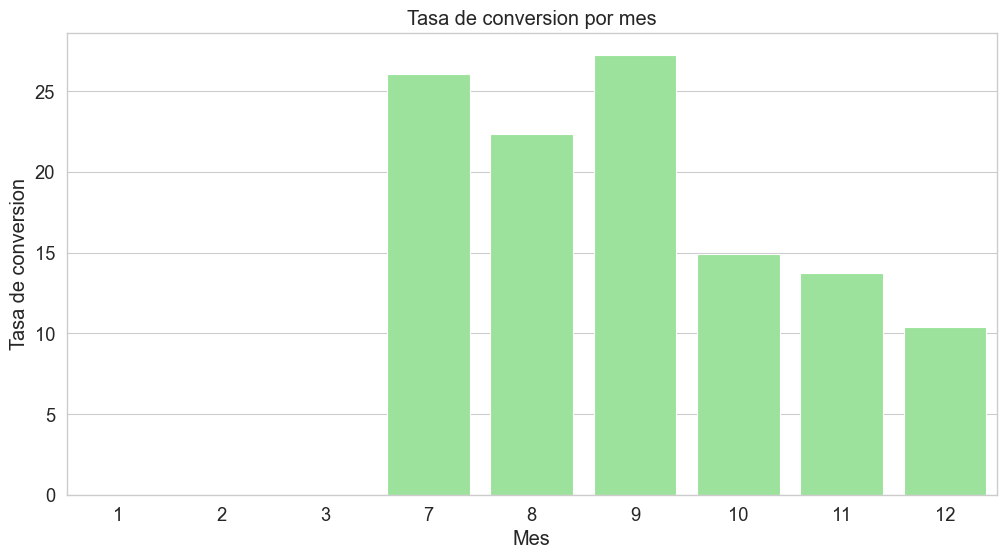

In [31]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(12, 6))
plt.title("Tasa de conversion por mes del año 2022")
ax = sns.barplot(x=tasa_conversion_mes_2022.index, y=tasa_conversion_mes_2022.values, color="lightgreen")
ax.set(xlabel="Mes", ylabel="Tasa de conversion")
plt.show()

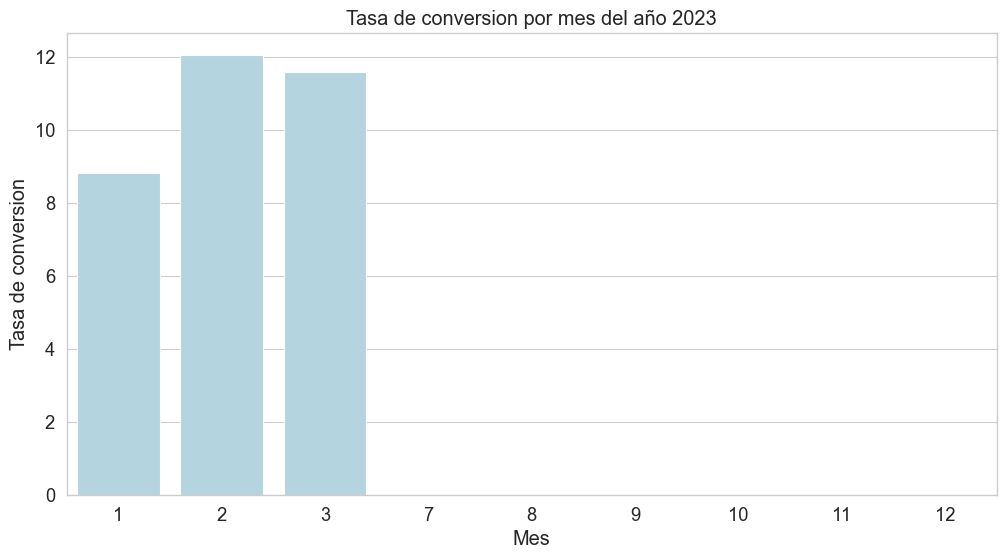

In [33]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(12, 6))
plt.title("Tasa de conversion por mes del año 2023")
ax = sns.barplot(x=tasa_conversion_mes_2023.index, y=tasa_conversion_mes_2023.values, color="lightblue")
ax.set(xlabel="Mes", ylabel="Tasa de conversion")
plt.show()

___

    ➢ Conclusión:

    En los últimos meses de 2022 hay una caída en la conversión total, con lo cual el cliente tiene razón en su reclamo. Sin embargo, en el 2023 hay un rebote para dicha caída. Por lo tanto, se puede inferir que la caída en la conversión se debe a un problema de la plataforma que se solucionó en el 2023.